In [1]:
%matplotlib notebook

# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit_csv = "TransitStopsBoardingsAndAlightings2019.csv"

# Read with Pandas
metrotransit_df = pd.read_csv(metrotransit_csv)
metrotransit_df.head(60)

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
0,Metro Transit,Urban Local,Core Local,2,East,51581.0,HENNEPIN AVE & FRANKLIN AVE / 22ND ST,NaN,44.961886,-93.292079,...,MINNEAPOLIS,92.0,92.0,Weekday,75,8.0,1.0,100%,N,NaN
1,Metro Transit,Urban Local,Core Local,2,East,1099.0,HENNEPIN AVE S & 22ND ST W,NaN,44.961030,-93.292777,...,MINNEAPOLIS,92.0,92.0,Weekday,33,2.0,2.0,100%,N,NaN
2,Metro Transit,Urban Local,Core Local,2,East,13340.0,DUPONT AVE & FRANKLIN AVE W,NaN,44.962534,-93.293016,...,MINNEAPOLIS,92.0,92.0,Weekday,17,1.0,3.0,100%,N,NaN
3,Metro Transit,Urban Local,Core Local,2,East,13337.0,FRANKLIN AVE W & HENNEPIN AVE S,NaN,44.962630,-93.291123,...,MINNEAPOLIS,92.0,92.0,Weekday,177,2.0,4.0,100%,N,NaN
4,Metro Transit,Urban Local,Core Local,2,East,56705.0,FRANKLIN AVE W & LYNDALE AVE S,NaN,44.962642,-93.287697,...,MINNEAPOLIS,92.0,92.0,Weekday,143,4.0,5.0,100%,N,NaN
5,Metro Transit,Urban Local,Core Local,2,East,13330.0,FRANKLIN AVE W & PLEASANT AVE,NaN,44.962635,-93.283040,...,MINNEAPOLIS,92.0,92.0,Weekday,66,8.0,6.0,100%,N,NaN
6,Metro Transit,Urban Local,Core Local,2,East,56697.0,FRANKLIN AVE E & NICOLLET AVE,NaN,44.962615,-93.277632,...,MINNEAPOLIS,92.0,92.0,Weekday,586,72.0,7.0,100%,N,NaN
7,Metro Transit,Urban Local,Core Local,2,East,13320.0,FRANKLIN AVE E & 3RD AVE S,NaN,44.962623,-93.273016,...,MINNEAPOLIS,92.0,92.0,Weekday,249,62.0,8.0,100%,N,NaN
8,Metro Transit,Urban Local,Core Local,2,East,13316.0,FRANKLIN AVE E & PORTLAND AVE,NaN,44.962627,-93.267015,...,MINNEAPOLIS,92.0,92.0,Weekday,131,148.0,9.0,100%,N,NaN
9,Metro Transit,Urban Local,Core Local,2,East,13312.0,FRANKLIN AVE E & CHICAGO AVE,NaN,44.962615,-93.262737,...,MINNEAPOLIS,92.0,92.0,Weekday,210,230.0,10.0,100%,N,NaN


In [2]:
Route_df = metrotransit_df.groupby("Route Type")
Route_df.count()

,Provider,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,x-coordinate,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
Route Type,,,,,,,,,,,,,,,,,,,,,
Express,7546,7546,7546,7532,7546,7546,93,7546,7546,7546,...,7546,7546,5795,7546,5809,5795,7546,6698,7546,38
Suburban Local,8321,8321,8321,8321,8321,8321,228,8321,8321,8321,...,8321,8321,6373,8321,6373,6373,8321,8279,8321,71
Urban Local,23252,23252,23252,23126,23252,23252,348,23252,23252,23252,...,23252,23252,23093,23252,23093,22967,23252,23252,23252,292


In [3]:
schedule_df = metrotransit_df.groupby("Schedule")
schedule_df.count()

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,y-coordinate,City,Trips,Obs Trips,Ons,Offs,Seq,%Sampled,Downtown,Comment
Schedule,,,,,,,,,,,,,,,,,,,,,
Saturday,9313,9313,9313,9313,9271,9313,9313,175,9313,9313,...,9313,9313,9313,8923,8923,8881,9313,9313,9313,100
Sunday,7496,7496,7496,7496,7454,7496,7496,152,7496,7496,...,7496,7496,7496,7106,7106,7064,7496,7496,7496,73
Weekday,22303,22303,22303,22303,22254,22303,22303,341,22303,22303,...,22303,22303,22303,19232,19239,19190,22303,21413,22303,228
Weekend,7,7,7,7,0,7,7,1,7,7,...,7,7,7,0,7,0,7,7,7,0


In [4]:
core_local_df=metrotransit_df.loc[metrotransit_df["Route Classification"]=="Core Local"]
print(len(core_local_df["Site_id"].unique()))

5991


In [5]:
sample_core_local_df = core_local_df.sample(n = 200)

ons = sample_core_local_df["Ons"]
offs = sample_core_local_df["Offs"]

# # The maximum x value for our chart will be 100
# x_limit = 50

# # List of values from 0 to 50 each value being 1 greater than the last
# x_axis = np.arange(int(core_local_df["Ons"].min()), x_limit, int(core_local_df["Ons"].max())

# # Create a random array of data that we will use for our y values
# data = [random.random() for value in x_axis]


# plt.scatter(ons, offs, marker="o", facecolors="red", edgecolors="black")
# plt.xlabel("Ons")
# plt.ylabel("Offs")


                                         Geo_Node_Name   Ons   Offs
22223                           7TH & NICOLLET STATION  1061  124.0
83                            PLEASANT ST & JONES HALL   938  108.0
3167                          NICOLLET MALL & 7TH ST S   898  107.0
6189                             5TH ST & MINNESOTA ST   750   34.0
31543                           7TH & NICOLLET STATION   731   73.0
1775                          NICOLLET MALL & 5TH ST S   724  110.0
1175                          NICOLLET MALL & 7TH ST S   718  172.0
22161                           46TH ST STATION GATE A   697    6.0
22181                  ROSEDALE TRANSIT CENTER  GATE A   693    4.0
31501                  ROSEDALE TRANSIT CENTER  GATE A   680    4.0
5187                        MOA TRANSIT STATION GATE B   678   14.0
22173                    SNELLING & UNIVERSITY STATION   668  525.0
782    CHICAGO AVE S & CHICAGO LAKE TRANSIT CTR GATE C   668  282.0
26651                       MOA TRANSIT STATION 

<IPython.core.display.Javascript object>


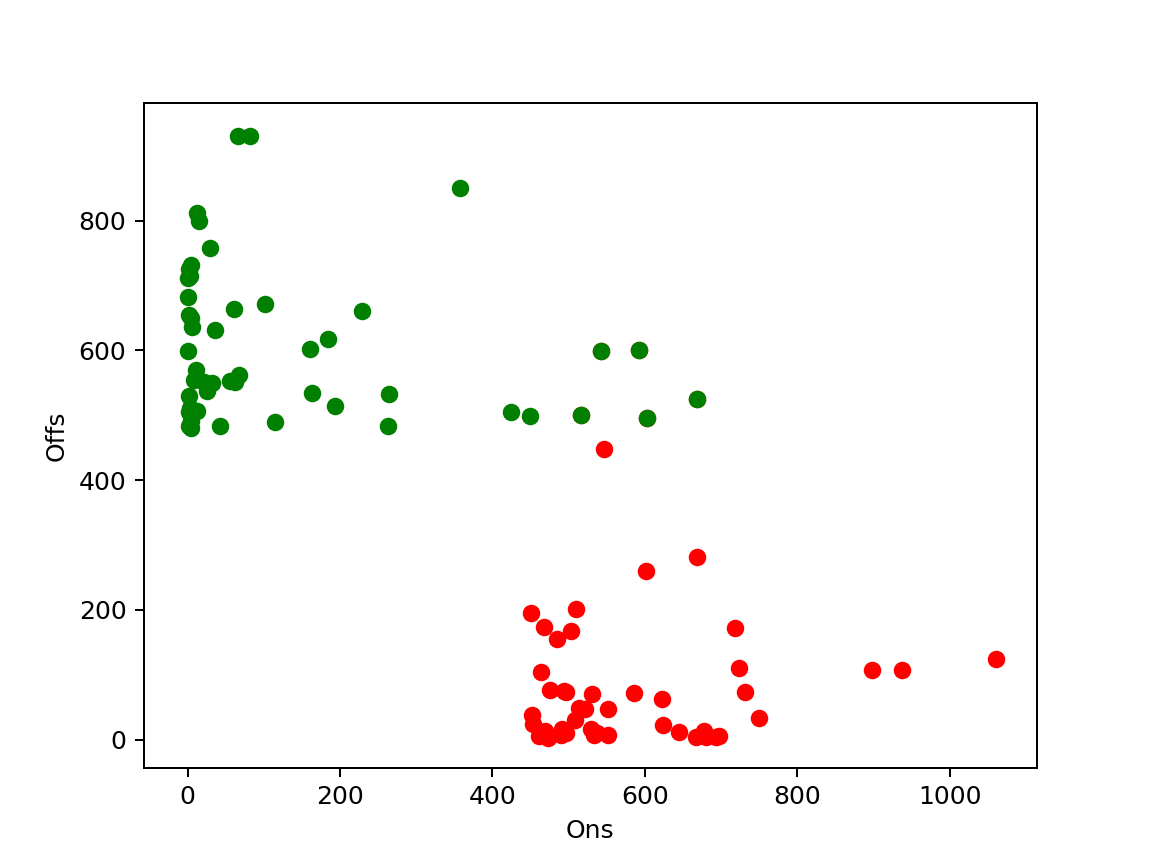

In [6]:
df_station_on=pd.DataFrame(metrotransit_df,columns=["Geo_Node_Name","Ons","Offs"])
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind'quicksort', na_position='last')
#print(df_station_on.head(20))
df_station_on=df_station_on.dropna()
df_station_on["Ons"]=df_station_on["Ons"].str.replace(',', '')
df_station_on["Ons"]=df_station_on["Ons"].astype(int)
#print(df_station_on.head(50))
df_station_max=df_station_on["Ons"].max()
#print(df_station_max)
df_station_on=df_station_on.sort_values(by="Ons",ascending=False)
df_station_on_sample=df_station_on.head(50)
print(df_station_on_sample)
plt.scatter(df_station_on_sample["Ons"],df_station_on_sample["Offs"],color="red")

In [7]:
df_station_on=pd.DataFrame(metrotransit_df,columns=["Geo_Node_Name","Ons","Offs"])
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind'quicksort', na_position='last')
#print(df_station_on.head(20))
df_station_on=df_station_on.dropna()
df_station_on["Ons"]=df_station_on["Ons"].str.replace(',', '')
df_station_on["Ons"]=df_station_on["Ons"].astype(int)
#print(df_station_on.head(20))
#df_station_max=df_station_on["Ons"].max()
#print(df_station_max)
df_station_off=df_station_on.sort_values(by="Offs",ascending=False)
df_station_off_sample=df_station_off.head(50)
print(df_station_off)
plt.scatter(df_station_off_sample["Ons"],df_station_off_sample["Offs"],color="green")
plt.xlabel("Ons")
plt.ylabel("Offs")

                              Geo_Node_Name  Ons   Offs
3157               NICOLLET MALL & 7TH ST S   82  930.0
22257              6TH ST S & NICOLLET MALL   66  930.0
929    CHICAGO LAKE TRANSIT CENTER & GATE A  357  850.0
20170     MAPLE GROVE P&R & TRANSIT STATION   12  812.0
21546            FOLEY P&R & EVERGREEN BLVD   15  800.0
...                                     ...  ...    ...
18209        MEDICINE LAKE RD & XYLON AVE N    0    0.0
18208       MEDICINE LAKE RD & AQUILA AVE N    0    0.0
18207        MEDICINE LAKE RD & DECATUR AVE    0    0.0
29293             15TH ST N & GOODWIN AVE N    2    0.0
20220  93RD AVE (CO RD 30) & FERNBROOK LANE    0    0.0

[35135 rows x 3 columns]


Text(0, 0.5, 'Offs')

In [8]:
import scipy.stats as st
x_values = df_station_on["Ons"]
y_values = df_station_on["Offs"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Ons')
# plt.ylabel('offs')
# plt.show()
print(line_eq)

y = 0.39x + 6.79


# Hypothesis: If the number of Ons is related to the number of Offs of a street cross location, then the large number               of Ons will result in large number of Offs.
# Null hypothesis: If the number of Ons is not related to the number of Offs of a street cross location, then the large             number of Ons will not result in large number of Offs.



In [9]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
import scipy.stats as stats
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
print(critical_value)

5.991464547107979


In [10]:
#try to test if ons and offs do have a relation? what lind of test I should use?
#why below is some error
#stats.chisquare(df_station_on["Ons"],df_station_on["Offs"])
#?????????????????

In [11]:
#stats.ttest_1samp(df_station_on["Ons"].mean(),df_station_on["Offs"].mean())
#?????????????????????/

The lower quartile of ons is: 28.0
The upper quartile of ons is: 122.0
The interquartile range of ons is: 94.0
The the median of ons is: 68.0 
Values below -113.0 could be outliers.
Values above 263.0 could be outliers.


<IPython.core.display.Javascript object>


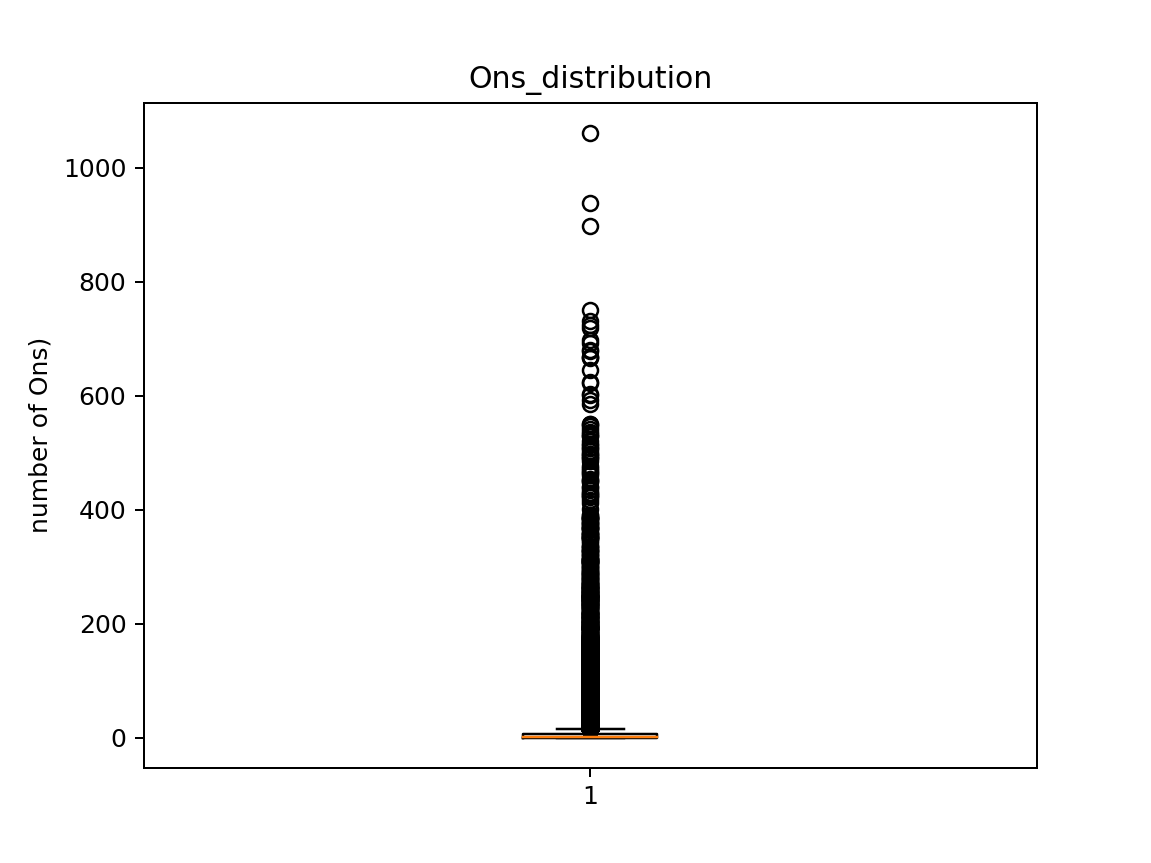

In [15]:
quartiles = df_station_on["Ons"].head(50).quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ons is: {lowerq}")
print(f"The upper quartile of ons is: {upperq}")
print(f"The interquartile range of ons is: {iqr}")
print(f"The the median of ons is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Ons_distribution')
ax1.set_ylabel('number of Ons)')
ax1.boxplot(df_station_on["Ons"])
plt.show()

The lower quartile of offs is: 8.0
The upper quartile of offs is: 144.0
The interquartile range of offs is: 136.0
The the median of offs is: 63.5 
Values below -196.0 could be outliers.
Values above 348.0 could be outliers.


<IPython.core.display.Javascript object>


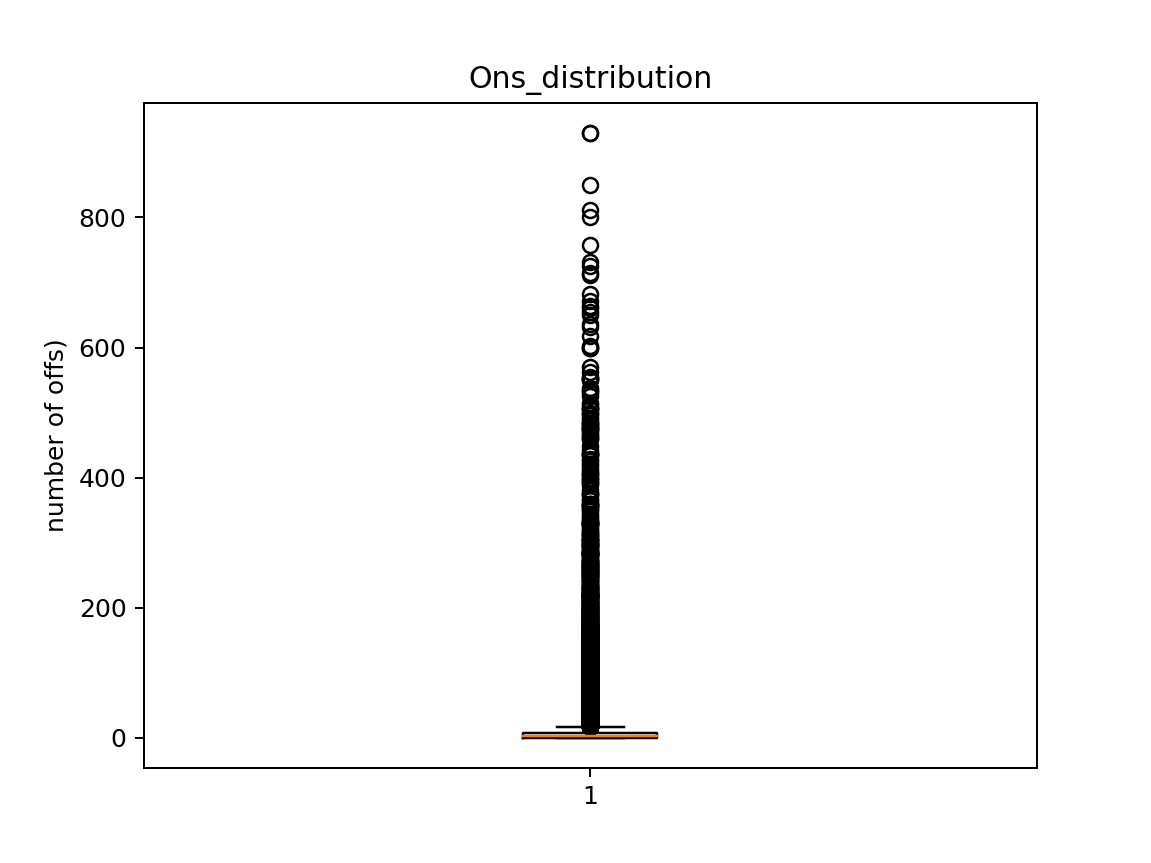

In [16]:
quartiles = df_station_on["Offs"].head(50).quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of offs is: {lowerq}")
print(f"The upper quartile of offs is: {upperq}")
print(f"The interquartile range of offs is: {iqr}")
print(f"The the median of offs is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Ons_distribution')
ax1.set_ylabel('number of offs)')
ax1.boxplot(df_station_on["Offs"])
plt.show()
#????how to combine into a single plot?